In [53]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

In [2]:
iris = pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X = iris.iloc[:, :-1]
y = iris.Species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [5]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
# choose a model
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

In [17]:
print('real values are: \n', y_train[:3])
regressor.predict(X_train[:3])

real values are: 
 22        Iris-setosa
15        Iris-setosa
65    Iris-versicolor
Name: Species, dtype: object


array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [23]:
y_hat = regressor.predict(X_test)

li = []
for i, j in zip(y_test, y_hat):
    if i == j:
        li.append('True')
    else:
        li.append('False')

li

['True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True']

In [ ]:
# performance evaluation
y_train_score = cross_val_score(regressor, X_train, y_train, cv=10, scoring='accuracy')

In [47]:
y_train_score

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.91666667])

In [ ]:
y_train_pred = cross_val_predict(regressor, X_train, y_train, cv=10)

In [49]:
y_train_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris

In [62]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[40,  0,  0],
       [ 0, 41,  0],
       [ 0,  1, 38]])

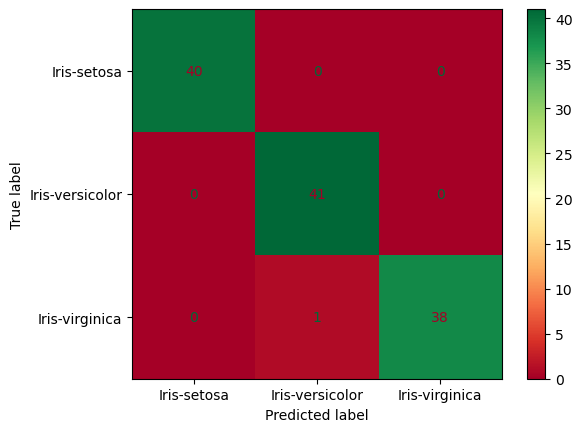

In [61]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, cmap='RdYlGn')

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

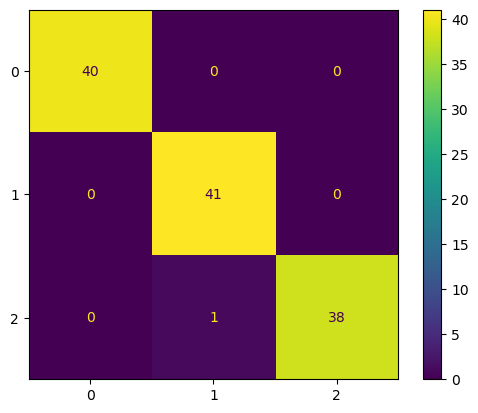

In [65]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot()